<a id="top">

# Warranty Claim Classification Using Machine Learning with Scikit-Learn

**Table of Contents:**

- [Goal of warranty claims classification](#goal)
- [Overall process summary](#overview)
- [Step 1: Working with raw data - features and label](#step1)
- [Step 2: Process features data](#step2)
- [Step 3: Train machine learning algorithm with features training data and label data](#step3)
- [Step 4: Provide test data](#step4)
- [Step 5: Predict/classify](#step5)
- [References](#references)

<a id="goal">

### Goal:

To study automatically flagging warranty claims as possible customer safety concern using machine learning classification with Python's [scikit-learn](http://scikit-learn.org) library.

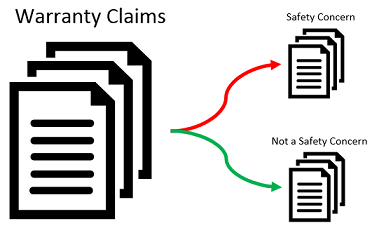

In [1]:
from IPython.display import Image 
Image(filename='FnS.png')

### Current situation:

Current system uses a large and complex query (implemented with IF/ELSE type of logic via SQL's CASE statement) to flag warranty claims as customer safety issue.  Based on experience, a seemingly slight or simple modification to the query, make it difficult to validate the results and requires extensive testing.  The study is to determine if we can apply machine learning classification to do the flagging instead which would negate the need to maintain a complex query and to study if this also results in easier validation.  This study could potentially lead to other areas of warranty or market data that could benefit from machine learning classification.

### The Data:

The data consists of 2 feature or attribute columns and a target or label column that would be used as input to train a machine learning algorithm.

**Features columns:**

- warranty claim part # (text, nominal, categorical data type)
- customer complaint description (free-hand text, document data type)

**Target / label column:**

- A binary/2-value flag to indicate whether or not the claim is a potential safety concern (0 - "false", 1 - "true")

**NOTE:** This sample data used for training was purposely made to be small to help facilitate faster work flow.  Inevitably, special methods will be needed if this process were to be applied in production with very large training data - see references at the very bottom of this notebook.  Furthermore, I did not go into additional processes such as model validation or model tuning.  I also did not explain why these 2 features data were chosen as there are other claim attributes that could be considered for candidate features.  Additionally, consideration need to be taken for imbalanced data which my data has since there are far fewer claims classified as customer safety issue than not.

<a id="overview">

### Before going into Python code, here is a high level process overview of the machine learning classification process

[[back to top]](#top)

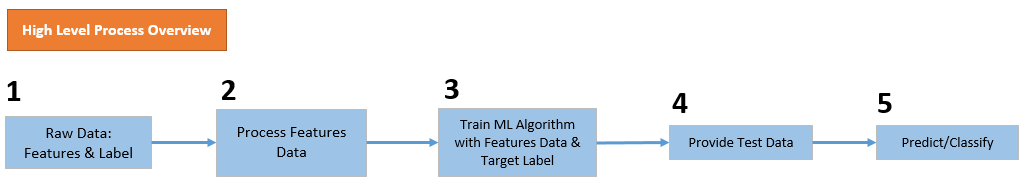

In [2]:
Image(filename='High_Level_Process.png')

### The following is Python code that I am using to implement the classification based on this [example](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) from scikit-learn's web site.

In [1]:
import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

<a id="step1">

# Step 1: Working with raw data - features and label

[[back to top]](#top)

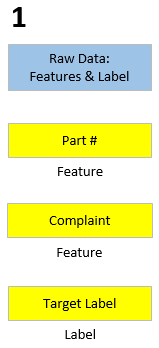

In [4]:
Image(filename='Step1.png')

In [2]:
data_set = pd.read_csv('FnS_temp.csv', usecols=[4,7,8])

### Sample Data:

In [3]:
data_set.head()

,SHRT_PART_NO,ORIG_CUST_CNTN_TXT,TARGET
0,01473,DURING LAST SERVICE INSPECTION TECH FOUND LEFT...,0
1,04712,CLIENT STATES THERE IS DAMAGE UNDER FRONT BUMP...,0
2,04712,CLIENT STATES THERE IS DAMAGE UNDER FRONT BUMP...,1
3,04715,CUSTOMER STATES REAR RIGHT BUMPER IS OUT OF AL...,1
4,04715,PER DPSM SUBLET LR QUARTER TO BODY SHOP,1


### Create the 2 features variables and the one target variable

In [4]:
partno = data_set.SHRT_PART_NO.values
complaints = data_set.ORIG_CUST_CNTN_TXT.values
target = data_set.TARGET.values

<a id="step2">

# Step 2: Process the part # and complaint features data

[[back to top]](#top)

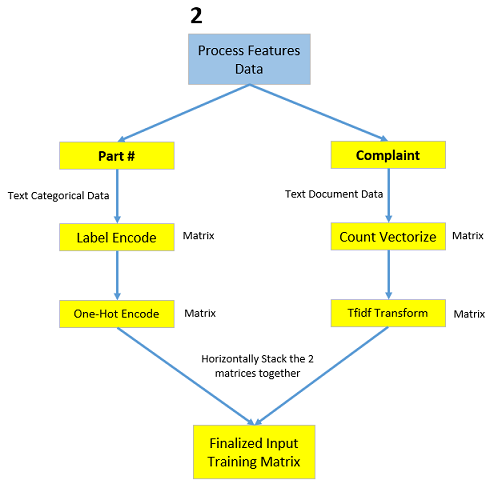

In [8]:
Image(filename='Step2.png')

## Process the part # feature data:

If you are familiar with machine learning, you would know that many machine learning algorithms typically require that the input data consists of numerical values.  The data we have is not numerical, but contains text data.  Therefore, we need to convert the textual data to numerical data somehow.  This is what we generally mean by processing or preparing the machine learning data and the terminology typically used is to "encode" or "transform" the data.

The ```partno``` data will be converted to integers using scikit-learn's ```LabelEncoder()``` object.  However, after it has been label encoded, you will notice that the part #s are ordered from 0 to total # of unique part #s.  This ordering of part #s do not hold any significance and so we do not want our machine learning algorithm to think there is also and possibly influence the prediction model.  So we need to perform an additional transformation called ```one-hot``` encoding.  This will essentially remove the appearance that the ordering of the part #s matter.  For more information about encoding or transforming categorical machine learning data, see the references at the very bottom of this notebook.

### ```partno``` is a categorical variable consisting of string value, so need to perform Label Encoding to convert to integer values

In [5]:
enc_label = LabelEncoder()
X_train_partno_labelencoded = enc_label.fit_transform(partno)

In [6]:
X_train_partno_labelencoded

array([  0,   1,   1,   2,   2,   3,   4,   5,   5,   5,   6,   7,   8,
         9,  10,  11,  12,  13,  14,  14,  15,  15,  15,  15,  15,  15,
        15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  16,
        17,  18,  18,  18,  18,  18,  19,  20,  20,  21,  22,  22,  22,
        22,  22,  22,  22,  22,  22,  22,  22,  22,  22,  22,  22,  22,
        22,  22,  23,  24,  25,  25,  26,  27,  28,  28,  28,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  36,  36,  36,  36,  36,  36,
        37,  38,  38,  39,  39,  40,  41,  41,  41,  41,  41,  42,  42,
        42,  42,  42,  43,  44,  45,  45,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  49,  50,  51,  52,  53,  54,  54,  54,  54,
        54,  54,  55,  56,  57,  57,  57,  58,  59,  60,  61,  61,  62,
        62,  62,  63,  64,  65,  66,  66,  67,  68,  69,  70,  71,  71,
        71,  71,  71,  72,  73,  74,  75,  76,  77,  78,  79,  79,  80,
        80,  81,  81,  82,  82,  83,  84,  85,  85,  85,  86,  8

In [7]:
type(X_train_partno_labelencoded)

numpy.ndarray

In [8]:
X_train_partno_labelencoded.shape

(301,)

### Now we can perform one-hot encoding on the label encoded data:

In [9]:
enc_onehot = OneHotEncoder()
X_train_partno_onehot = enc_onehot.fit_transform(X_train_partno_labelencoded)

ValueError: Expected 2D array, got 1D array instead:
array=[   0.    1.    1.    2.    2.    3.    4.    5.    5.    5.    6.    7.
    8.    9.   10.   11.   12.   13.   14.   14.   15.   15.   15.   15.
   15.   15.   15.   15.   15.   15.   15.   15.   15.   15.   15.   15.
   15.   15.   16.   17.   18.   18.   18.   18.   18.   19.   20.   20.
   21.   22.   22.   22.   22.   22.   22.   22.   22.   22.   22.   22.
   22.   22.   22.   22.   22.   22.   22.   23.   24.   25.   25.   26.
   27.   28.   28.   28.   28.   29.   30.   31.   32.   33.   34.   35.
   36.   36.   36.   36.   36.   36.   36.   37.   38.   38.   39.   39.
   40.   41.   41.   41.   41.   41.   42.   42.   42.   42.   42.   43.
   44.   45.   45.   46.   46.   46.   47.   47.   48.   48.   48.   48.
   48.   49.   50.   51.   52.   53.   54.   54.   54.   54.   54.   54.
   55.   56.   57.   57.   57.   58.   59.   60.   61.   61.   62.   62.
   62.   63.   64.   65.   66.   66.   67.   68.   69.   70.   71.   71.
   71.   71.   71.   72.   73.   74.   75.   76.   77.   78.   79.   79.
   80.   80.   81.   81.   82.   82.   83.   84.   85.   85.   85.   86.
   86.   86.   86.   86.   87.   87.   87.   87.   88.   88.   88.   88.
   88.   88.   89.   89.   89.   89.   89.   89.   90.   90.   90.   90.
   90.   91.   91.   91.   92.   92.   92.   92.   92.   92.   92.   92.
   92.   93.   93.   93.   94.   95.   96.   97.   98.   99.  100.  101.
  102.  103.  103.  103.  104.  105.  106.  107.  107.  108.  109.  110.
  111.  112.  113.  113.  114.  115.  115.  116.  117.  118.  119.  120.
  121.  122.  123.  124.  124.  125.  126.  127.  128.  128.  129.  129.
  130.  131.  132.  133.  134.  135.  135.  136.  136.  137.  138.  139.
  140.  141.  141.  142.  142.  142.  143.  143.  144.  145.  146.  147.
  148.  148.  148.  148.  148.  149.  149.  150.  151.  151.  151.  151.
  152.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [10]:
X_train_partno_labelencoded.shape

(301,)

### Due to deprecation warning, converting 1-D part # training data to 2-D with ```reshape(-1,1)```:

In [11]:
X_train_partno_onehot = enc_onehot.fit_transform(X_train_partno_labelencoded.reshape(-1,1))

In [12]:
X_train_partno_onehot

<301x153 sparse matrix of type '<class 'numpy.float64'>'
	with 301 stored elements in Compressed Sparse Row format>

Our ```X_train_partno_onehot``` is a compressed sparse row (csr) sparse matrix, which essentially means that it will contain non-zero values to conserve space and increase processing efficiency.

In [13]:
X_train_partno_onehot.data

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

## Process the customer complaint feature data

**```complaints```** is a feature column containing string values, but it is not categorical since it is not limited to a known number of values.  So in this case, to my understanding, I would tranform with CountVectorizer and then TfidfTransformer per this scikit-learn [example](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) on working with text data

### ```Vectorize``` the complaints training data with ```CountVectorizer```

In [14]:
count_vect = CountVectorizer()
X_train_complaint_counts = count_vect.fit_transform(complaints)
X_train_complaint_counts.shape

(301, 1141)

### ```Transform``` the complaints training data with ```tfidf```

In [15]:
tfidf_transformer = TfidfTransformer()
X_train_complaint_tfidf = tfidf_transformer.fit_transform(X_train_complaint_counts)
X_train_complaint_tfidf.shape

(301, 1141)

In [16]:
type(X_train_complaint_tfidf)

scipy.sparse.csr.csr_matrix

### Combine/concatenate the partno feature with the complaint feature data along the column axis or horizontal axis

Horizontally stack the 2 matrices together:

In [17]:
X_train_combined_tfidf = sparse.hstack((X_train_partno_onehot, X_train_complaint_tfidf), format='csr')

In [18]:
X_train_combined_tfidf

<301x1294 sparse matrix of type '<class 'numpy.float64'>'
	with 4451 stored elements in Compressed Sparse Row format>

<a id="step3">

# Step 3: Train the machine learning algorithm

[[back to top]](#top)

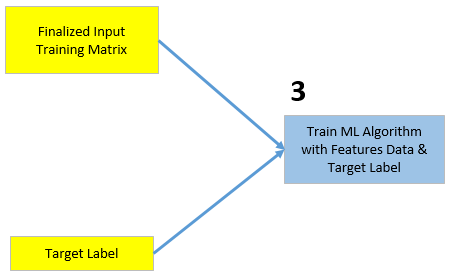

In [23]:
Image(filename='Step3.png')

### Train to a model (Multinomial Naive Bayes)

In [19]:
clf = MultinomialNB().fit(X_train_combined_tfidf, target)

<a id="step4">

# Steps 4 and 5: Provide test data and predict label

[[back to top]](#top)

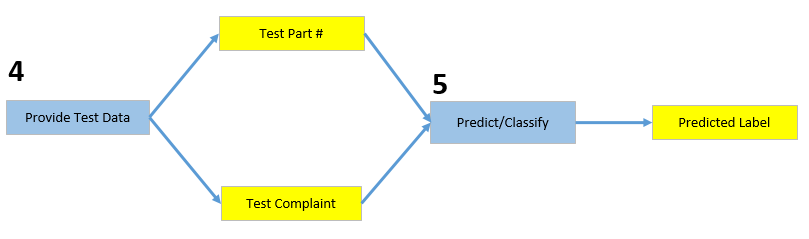

In [25]:
Image(filename='Steps4-5.png')

In [20]:
part_test = np.array(['19301'])
complaint_test = np.array(['CLIENT STATES THE CHECK EMISSIONS LIGHT IS ON'])

X_new_part_labelencoded = enc_label.transform(part_test)
X_new_part_onehot = enc_onehot.transform(X_new_part_labelencoded.reshape(-1,1))

X_new_complaint_counts = count_vect.transform(complaint_test)
X_new_complaint_tfidf = tfidf_transformer.transform(X_new_complaint_counts)

# Horizontally stack together the 2 sparse matrices
X_new_combined_tfidf = sparse.hstack((X_new_part_onehot, X_new_complaint_tfidf), format='csr')

predicted = clf.predict(X_new_combined_tfidf)

<a id="step5">

Now the prediction works and it flags the **19301 / CLIENT STATES THE CHECK EMISSIONS LIGHT IS ON** combination to 0/zero:

In [21]:
predicted

array([0])

<a id="references">

### References:

- Practical Business Python [article](http://pbpython.com/categorical-encoding.html) on encoding categorical data
- scikit-learn's [example](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) on how to work with text data and also explains Tf-idf transformation that the previous reference does not cover.
- When processing the feature data, they end up in a data format called ```sparse matrix```.  Refer to this wikipedia [article](https://en.wikipedia.org/wiki/Sparse_matrix) for more information.
- This [article](http://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) explains why with nominal (ordering does not matter) categorical data, you have to BOTH label encode and one-hot encode.  With ordinal (ordering matters) categorical data, you can stop with just label encoding.
- scikit-learn [suggestion](http://scikit-learn.org/stable/modules/scaling_strategies.html) on how to handle very large data; also reason why I chose Multinomial Naive Bayes algorithm since I will eventually have to use very large training data.  MultinomialNB supports partial_fit() method which supports processing data in "chunks" or pieces at a time.
- [Blog](https://beckernick.github.io/oversampling-modeling/) on how to deal with imbalanced data by oversampling the minority class features data and the scikit-learn's imbalanced-learned module [documentation](http://contrib.scikit-learn.org/imbalanced-learn/stable/auto_examples/index.html#model-selection) on oversampling.

[[back to top]](#top)